# Happy or sad

In [1]:
import os
import cv2
import numpy as np

#for splitting the data into train/test sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tesor flow keras cnn model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#plot images
import matplotlib.pyplot as plt

In [2]:
folder_dir="D:\\img_class\\dataset"

In [3]:
data=[]
label=[]
SIZE=128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir,folder)):
        if file.endswith("jpg"):
            label.append(folder) #for saving what all classes we are having
            img=cv2.imread(os.path.join(folder_dir,folder,file))
            img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            im=cv2.resize(img_rgb,(SIZE,SIZE))
            data.append(im)
        else:
            continue

In [4]:
data_arr=np.array(data)
label_arr=np.array(label)

In [5]:
encoder=LabelEncoder()
y=encoder.fit_transform(label_arr)
y=to_categorical(y,2) #becaue we have 2 different categories
x=data_arr/255
x[0]

array([[[0.85098039, 0.84313725, 0.84705882],
        [0.85882353, 0.84705882, 0.84313725],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94117647, 0.93333333, 0.94509804],
        [0.94117647, 0.93333333, 0.94509804],
        [0.94117647, 0.93333333, 0.94509804]],

       [[0.85098039, 0.84313725, 0.84705882],
        [0.85490196, 0.83921569, 0.83529412],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94117647, 0.93333333, 0.94509804]],

       [[0.85098039, 0.84313725, 0.84705882],
        [0.85490196, 0.83921569, 0.83529412],
        [0.8627451 , 0.84705882, 0.84313725],
        ...,
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961],
        [0.94509804, 0.9372549 , 0.94901961]],

       ...,

       [[0.38431373, 0.56078431, 0.65098039],
        [0.48235294, 0.6627451 , 0.74509804],
        [0.44313725, 0

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [7]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation = "softmax")) #The first parameter is the number of classes

In [8]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(x_train)

In [9]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=3
epochs=16
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1)

C:\Users\Biancaa. R\AppData\Local\Temp\ipykernel_22140\907817849.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/16
39/39 [==============================] - 13s 303ms/step - loss: 0.9068 - accuracy: 0.4828 - val_loss: 0.6912 - val_accuracy: 0.4828
Epoch 2/16
39/39 [==============================] - 12s 303ms/step - loss: 0.7031 - accuracy: 0.6121 - val_loss: 0.6924 - val_accuracy: 0.4828
Epoch 3/16
39/39 [==============================] - 11s 283ms/step - loss: 0.6910 - accuracy: 0.5259 - val_loss: 0.6887 - val_accuracy: 0.4828
Epoch 4/16
39/39 [==============================] - 12s 298ms/step - loss: 0.6806 - accuracy: 0.5948 - val_loss: 0.6094 - val_accuracy: 0.7586
Epoch 5/16
39/39 [==============================] - 15s 384ms/step - loss: 0.6543 - accuracy: 0.6466 - val_loss: 0.6324 - val_accuracy: 0.6897
Epoch 6/16
39/39 [==============================] - 17s 445ms/step - loss: 0.6686 - accuracy: 0.6638 - val_loss: 0.7536 - val_accuracy: 0.5517
Epoch 7/16
39/39 [==============================] - 15s 373ms/step - loss: 0.7103 - accuracy: 0.6552 - val_loss: 0.6891 - val_accuracy: 0.5172

1/1 [==============================] - 0s 346ms/step


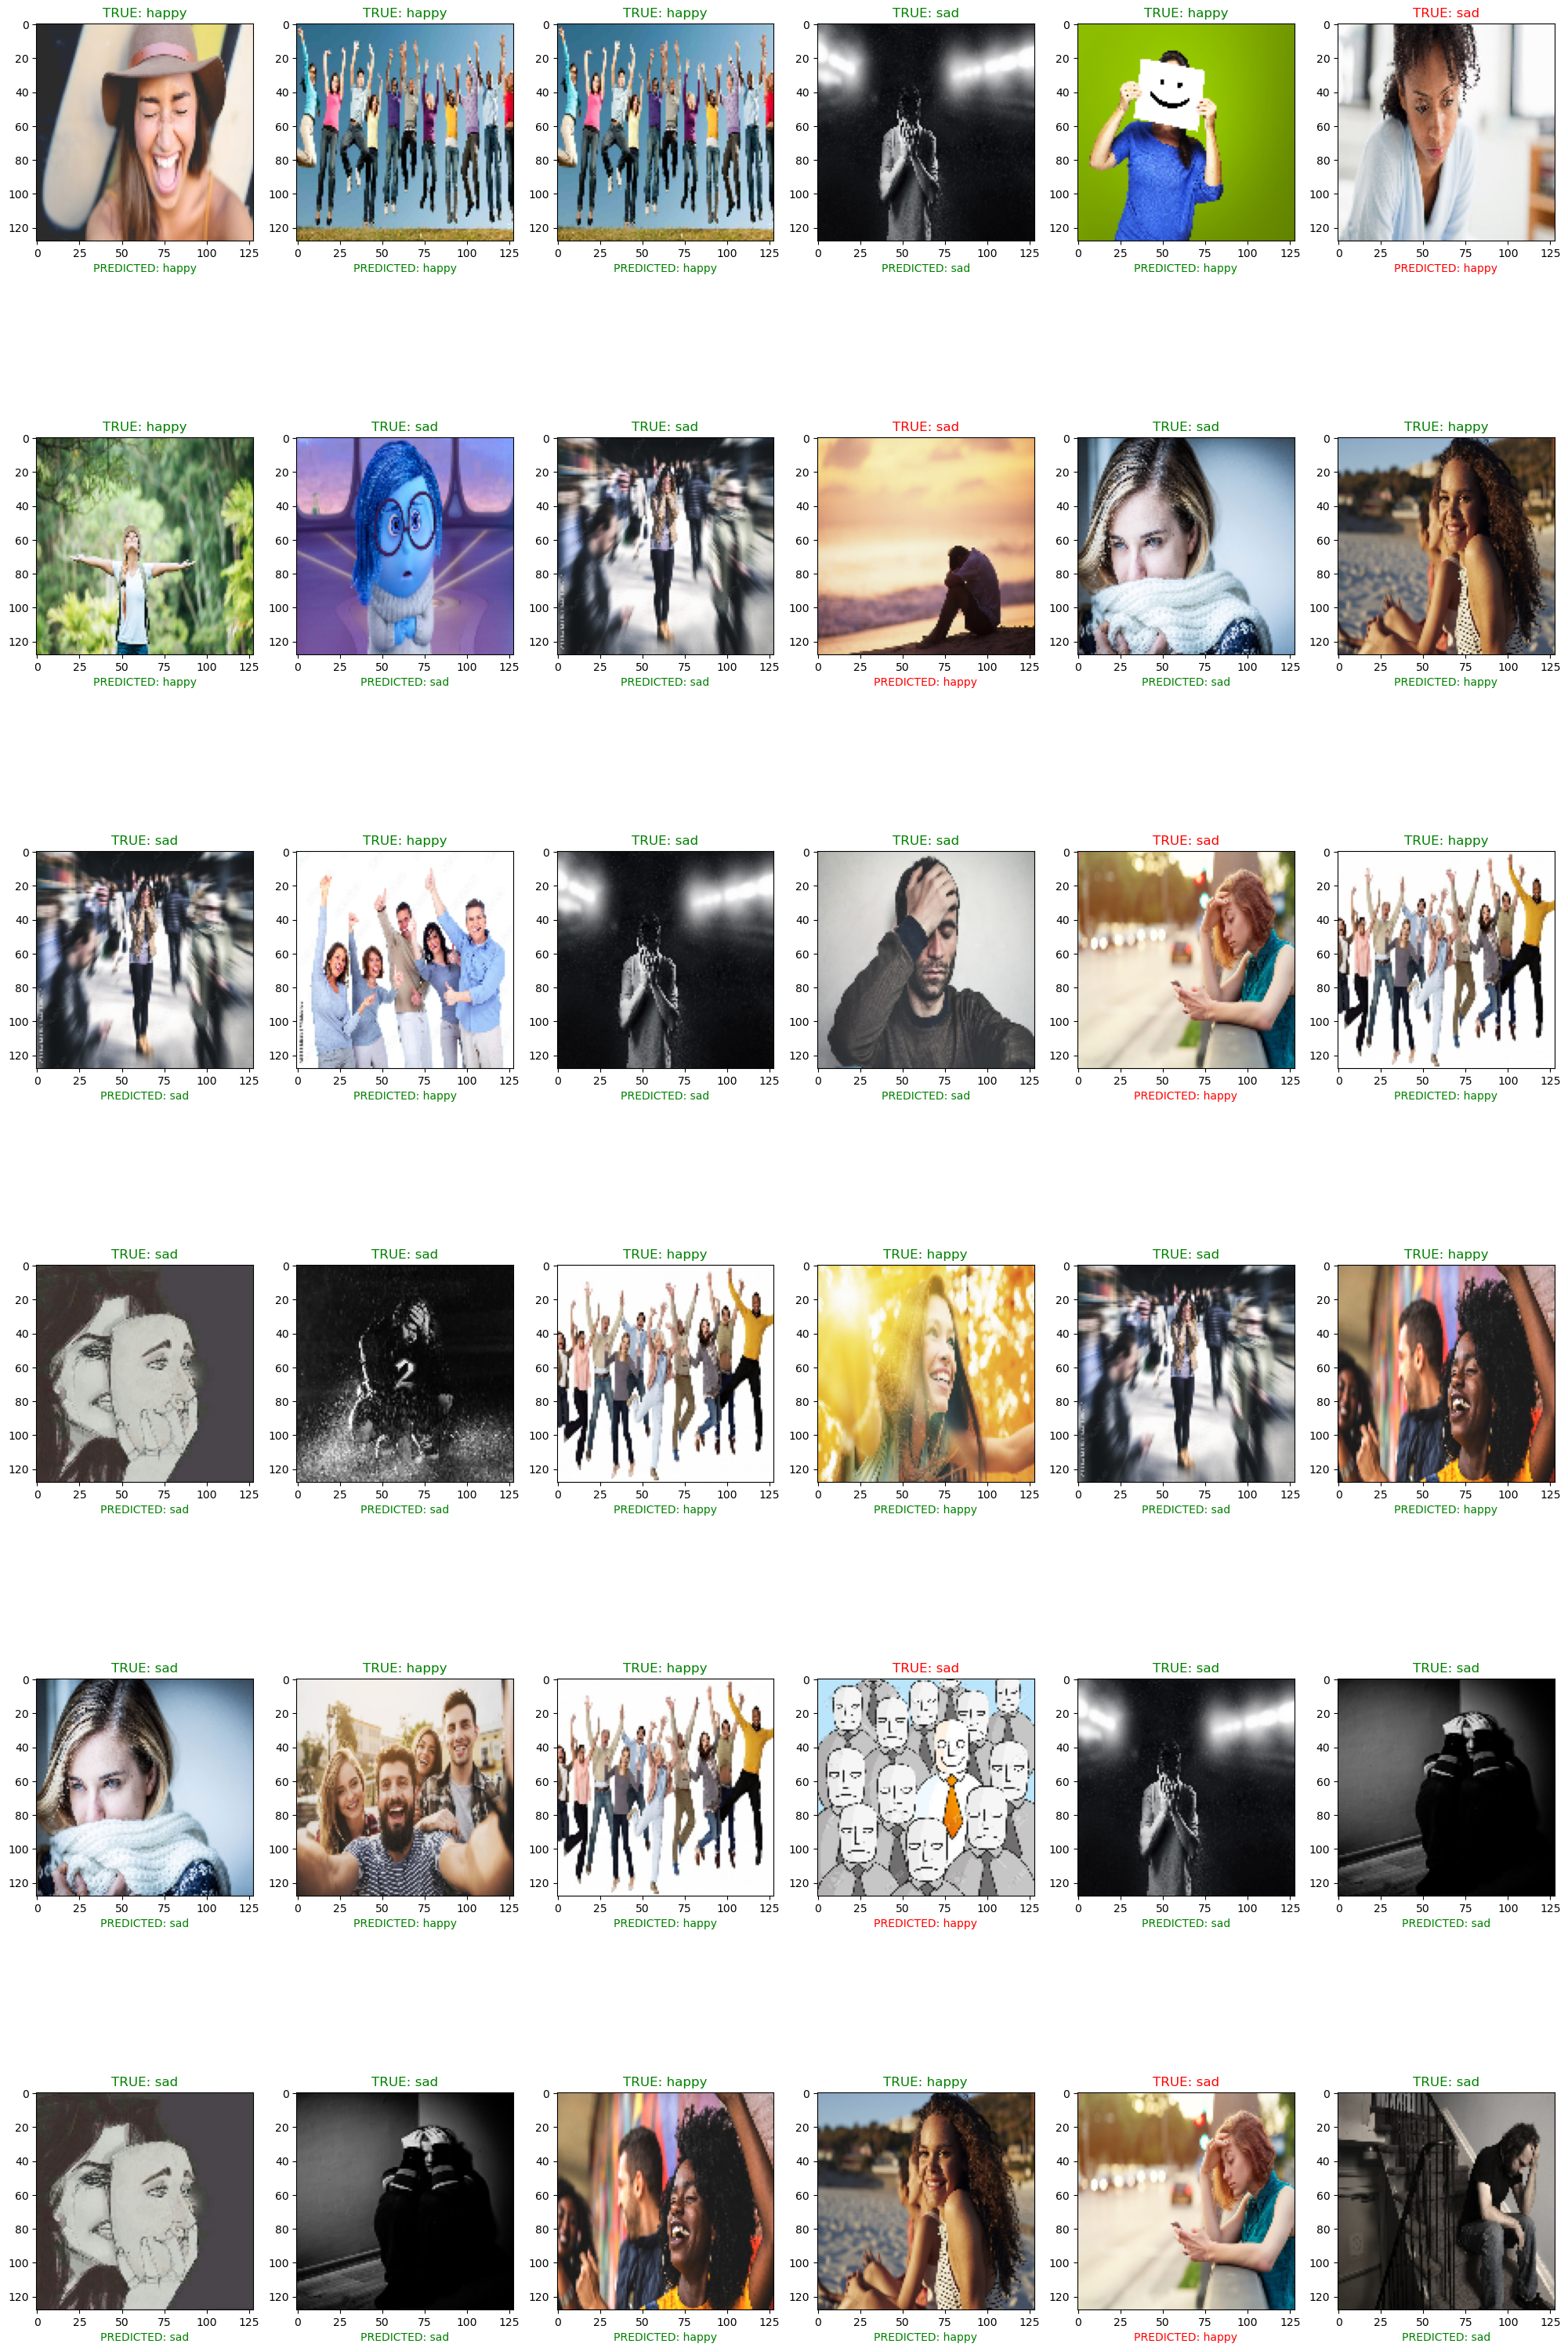

In [10]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(x_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(x_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='green')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(x_test)[k])], color='red')
            ax[i,j].imshow(np.array(x_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')